# HR Analytics: Job Change of Data Scientists


## Select the optimal model for the problem
I create a list of models (without parameter tuning) and test them on this dataset. The goal is to identify a good model and I will tune the model in a separate section.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 

**Data Loading**
This dataset is processed already:
1. Remove unneeded features
2. Impute missing values
3. Encode ordinal variables
4. One hot encode for "Nominal variable
5. Impute minor outcome
6. Split the dataset into train and test. 
7. Then, standardize the numeric column based on train set

In [3]:
os.chdir('C:/Users/15177/Python_Project/HR_Analysis/Data/')

In [4]:
#### np array
X_train_scaled = pd.read_csv('X_train_scaled.csv').values
X_test_scaled = pd.read_csv('X_test_scaled.csv').values
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# 1) Create a list of models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

**Creat my own Ensemble Model**

In [6]:
LogisticRegression_clf = LogisticRegression(max_iter=1000)
SVM_SGD_clf            = SGDClassifier(loss='log')
DecisionTree_clf       = DecisionTreeClassifier()
RandomForest_clf       = RandomForestClassifier()
GradientBoost_clf      = GradientBoostingClassifier()
Xgboost_clf            = XGBClassifier(use_label_encoder=False)


voting_clf=VotingClassifier( 
    estimators = [
                  ('lg', LogisticRegression_clf),
                  ('sv', SVM_SGD_clf),
                  ('dt', DecisionTree_clf), 
                  ('rf', RandomForest_clf), 
                  ('gb', GradientBoost_clf),
                  ('xg', Xgboost_clf)
    ],
    voting='soft'
)

**Put all of my candidate models in a dictionary:**
I can train them at one shoot.

In [7]:
esimators = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM_SGD': SGDClassifier(loss='log'),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoost' :GradientBoostingClassifier(),
    'Xgboost': XGBClassifier(use_label_encoder=False),
    'My_voting_clf':voting_clf                     
} 

In [8]:
# Train model
for m in esimators:
    print(m + ' is fitted')
    esimators[m].fit(X_train_scaled, y_train)

LogisticRegression is fitted
SVM_SGD is fitted
DecisionTree is fitted
RandomForest is fitted
GradientBoost is fitted
Xgboost is fitted
[21:32:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
My_voting_clf is fitted
[21:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# 2) Prediction

In [9]:
Y_pred = dict()

for m in esimators:
    print(m + ' predicted')
    Y_pred[m] = esimators[m].predict(X_test_scaled)

LogisticRegression predicted
SVM_SGD predicted
DecisionTree predicted
RandomForest predicted
GradientBoost predicted
Xgboost predicted
My_voting_clf predicted


# 3) Model evaluation

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, roc_curve, accuracy_score

In [11]:
my_color = {
    'LogisticRegression': 'yellow',
    'SVM_SGD':            'darkorange',
    'DecisionTree':       'green',
    'RandomForest':       'black',
    'GradientBoost' :     'teal',
    'Xgboost':            'purple',
    'My_voting_clf':      'red'
}


**ROC curve for testing set**

LogisticRegression predicted
SVM_SGD predicted
DecisionTree predicted
RandomForest predicted
GradientBoost predicted
Xgboost predicted
My_voting_clf predicted


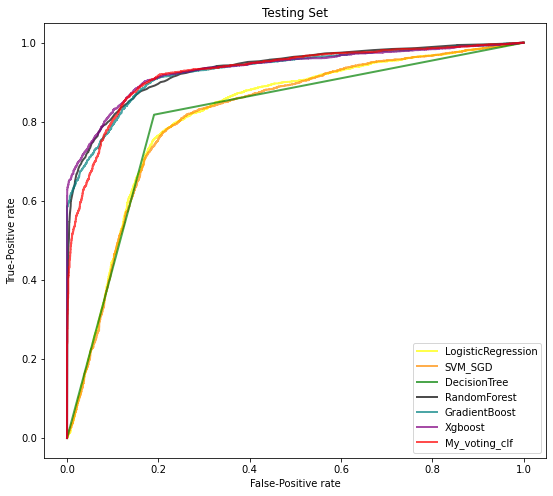

,AUC - TestingSet
Xgboost,0.933
RandomForest,0.932
GradientBoost,0.929
My_voting_clf,0.926
LogisticRegression,0.819
SVM_SGD,0.816
DecisionTree,0.814


In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(9,8)
Y_prob_pred = dict()
Area_under_ROC = dict()

for m in esimators:
    print(m + ' predicted')
    
    #### Probability of being a certain class
    ## This is matrix where row is the obervation, and columns have the prob of being x-th class
    Y_prob_pred[m] = esimators[m].predict_proba(X_test_scaled) 
    ## For binary classification, we can only focus on calss-1
    y_prob_pred = Y_prob_pred[m][:,1]
    
    
    # Info to plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_pred, pos_label=1)
    
    
    # Area uner ROC
    Area_under_ROC[m] = np.round( roc_auc_score(   y_test,   y_prob_pred   ),3)
    
    # Plot
    plt.plot(fpr,tpr, label=m, color=my_color[m], linewidth=2, alpha=0.7)
    
    
plt.title('Testing Set')    
plt.xlabel('False-Positive rate')
plt.ylabel('True-Positive rate')
plt.legend()
plt.show()   

# Report AUC
pd.DataFrame.from_dict(Area_under_ROC, orient='index', columns=['AUC - TestingSet']).sort_values(by='AUC - TestingSet',ascending=False)

<p> <b> <span style="color:red"> NOTE: Top three models include: </span> </b> </p> 

1. Xgboost
2. RandomForest
3. Gradient Boost

Note: **My_voting_clf** is an ensemble model which has Xgboost, Random Forest, Gradient Boost, Logistic regression, Decision Tree, and SVM classifier. This model is just a reference.

**Overall performance for Testing set**

In [13]:
Overall_performance  = dict()

for m in esimators:
    print(m + ' predicted')
    Y_pred[m] = esimators[m].predict(X_test_scaled)
    Y_prob = esimators[m].predict_proba(X_test_scaled)[:,1]
    Overall_performance[m] = classification_report(y_test, Y_pred[m])
    
    
for m in Overall_performance:
    print('--------------------'+ m +'--------------------')
    print(Overall_performance[m])

LogisticRegression predicted
SVM_SGD predicted
DecisionTree predicted
RandomForest predicted
GradientBoost predicted
Xgboost predicted
My_voting_clf predicted
--------------------LogisticRegression--------------------
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      2876
         1.0       0.79      0.78      0.78      2876

    accuracy                           0.78      5752
   macro avg       0.78      0.78      0.78      5752
weighted avg       0.78      0.78      0.78      5752

--------------------SVM_SGD--------------------
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      2876
         1.0       0.78      0.78      0.78      2876

    accuracy                           0.78      5752
   macro avg       0.78      0.78      0.78      5752
weighted avg       0.78      0.78      0.78      5752

--------------------DecisionTree--------------------
              precision    

By reviewing accuracy and f1-score, I have the same conclusion that the *top 3 models* are:
1. Xgboost
2. RandomForest
3. Gradient Boost

# What's next

I will tune parameters for Xgboost, RandomForest, and GradientBoost using cross-validation. This is in a separate notebook.